In [155]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

from scipy.stats import multivariate_normal, norm

# Switching interactive mode on!
%matplotlib inline
sn.set_style('whitegrid')

In [156]:
#Parameters to set
mu_x = 0
variance_x = 1

mu_y = 0
variance_y = 1
    
covariance_xy = 0

mean_vec = np.array((mu_x, mu_y))
varcovmat = np.array([[variance_x, covariance_xy],
                      [covariance_xy, variance_y]])

#Create grid and multivariate normal
x = np.linspace(-3.,3.0,500)
y = np.linspace(-3,3,500)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y

BVNormal = multivariate_normal(mean_vec, varcovmat)

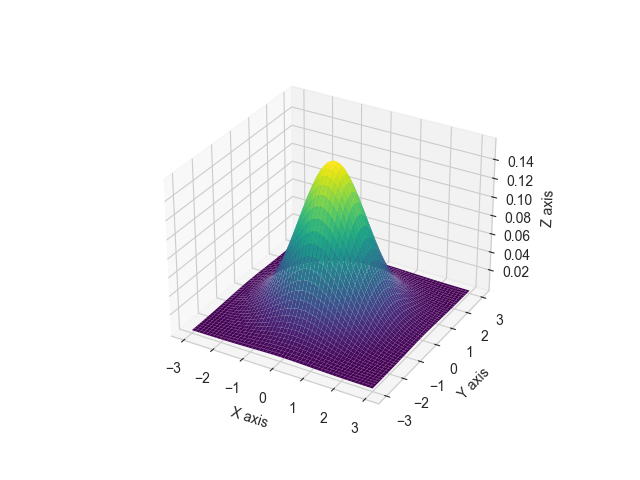

In [157]:
%matplotlib widget
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
ax.plot_surface(X, Y, BVNormal.pdf(pos),cmap='viridis',linewidth=0)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

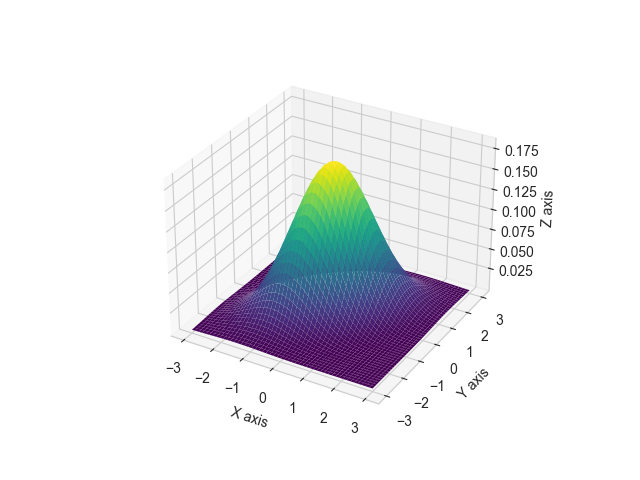

In [158]:
#Parameters to set
mu_x = 0
variance_x = 1

mu_y = 0
variance_y = 1

covariance_xy = 0.5

mean_vec = np.array((mu_x, mu_y))
varcovmat = np.array([[variance_x, covariance_xy],
                      [covariance_xy, variance_y]])

BVNormal2 = multivariate_normal(mean_vec, varcovmat)
plt.clf()
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
ax.plot_surface(X, Y, BVNormal2.pdf(pos),cmap='viridis',linewidth=0)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

## Part 2: Generating Normals as linear combinations of other normals

Case 1: Simple sum $X+Y \sim \mathcal{N}(\mu_1+\mu_2,\sigma_x^2+\sigma_y^2)$

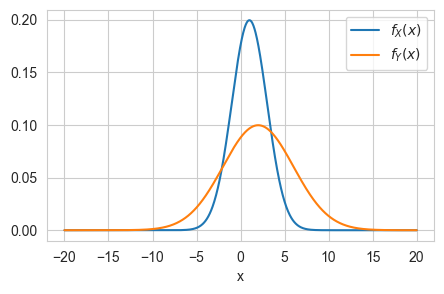

In [160]:
# Return to normal mode
%matplotlib inline

# Set the means and standard deviations - because scipy takes the standard deviation, not the variance, as a parameter!
mu_x, mu_y = 1,2
sd_x, sd_y = 2,4

# Generate the Random variable (so you can use it to draw from it, get the pdf, cdf, etc.)
Xvar = norm(mu_x,sd_x)
Yvar = norm(mu_y,sd_y)

# Time to plot the two distributions
x_range = np.linspace(-20,20,1000)
plt.figure(figsize=(5,3))
plt.plot(x_range,Xvar.pdf(x_range),label='$f_X(x)$')
plt.plot(x_range,Yvar.pdf(x_range),label='$f_Y(x)$')
plt.xlabel('x')
plt.legend()
plt.show()

Let's simulate by taking draws from $X$ and $Y$ and adding them up to get a sample of $X+Y$:

In [161]:
N = 10000
X_plus_Y = Xvar.rvs(size=N) + Yvar.rvs(size=N)

Let's plot it against the theoretical pdf:

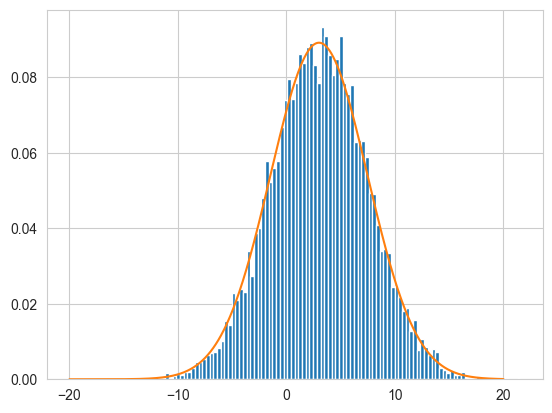

In [163]:
# Theoretical pdf
XYvar = norm(mu_x+mu_y,np.sqrt(sd_x**2+sd_y**2))

# Plot (make sure you normalize the histogram)
plt.hist(X_plus_Y,bins=100,density=True)
plt.plot(x_range,XYvar.pdf(x_range))
plt.show(True)

## Part 3: Cutting slices

In [164]:
from scipy.integrate import quad as integral

In [165]:
# Reset Bivariate normal
mu_x = 0
variance_x = 1

mu_y = 0
variance_y = 1

covariance_xy = 0

mean_vec = np.array((mu_x, mu_y))
varcovmat = np.array([[variance_x, covariance_xy],
                      [covariance_xy, variance_y]])

BVNormal = multivariate_normal(mean_vec, varcovmat)

In [166]:
# Define the marginal pdf as integrating over y for every x
def BVNormal_marginal_x(x):
    def BVNormal_fix_y(y):
        return BVNormal.pdf((x,y))
    res, eps = integral(BVNormal_fix_y,-np.inf,np.inf)
    return res

In [167]:
N= 100
x_range = np.linspace(-4,4,100)
Marginal_normal = np.zeros(x_range.size)
for i in range(x_range.size):
    Marginal_normal[i] = BVNormal_marginal_x(x_range[i])

In [168]:
# For the conditional we just need to normalize
conditional_normal = np.zeros(x_range.size)
for i in range(x_range.size):
    conditional_normal[i] = BVNormal.pdf((x_range[i],2))/(norm(0,1).pdf(2))

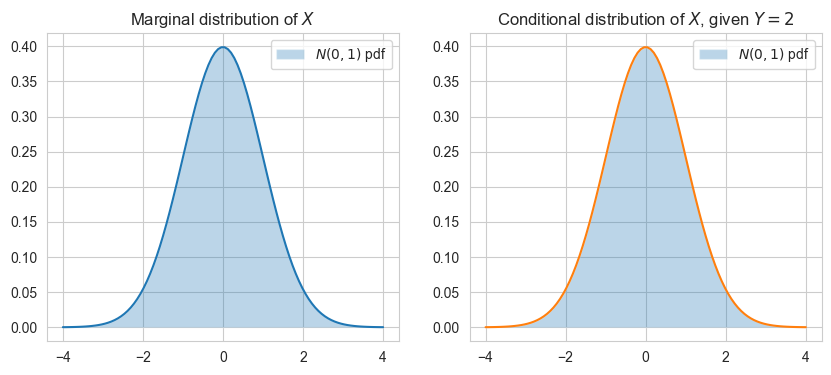

In [169]:
cls = sn.color_palette()

plt.figure(figsize=(10,4))
plt.subplot(121)
plt.title('Marginal distribution of $X$')
plt.plot(x_range,Marginal_normal)
plt.fill_between(x_range,norm(0,1).pdf(x_range),alpha=0.3,label=r'$N(0,1)$ pdf')
plt.legend()

plt.subplot(122)
plt.title('Conditional distribution of $X$, given $Y=2$')
plt.plot(x_range,conditional_normal,c=cls[1])
plt.fill_between(x_range,norm(0,1).pdf(x_range),alpha=0.3,label=r'$N(0,1)$ pdf')
plt.legend()

plt.show()